# Machine Vision
## Short introduction 
This is a course on machine vision, which is the field of let machine's see. Camera's create images and this 
course is about getting information out of this images. This sounds easier then it is. We humans are extremely 
good in interpreting visual input. Not that surprising, our survival depends for a large part on it. To let a computer 'see' isn't very easy, but luckily very many techniques have been developed to so. In this course we will take at a guided tour through the world of machine vision. When you have finished the course you will have gained many competences, let us list a few already.

You will be able find the peppers in the following image:


<img src="Data_Tutorial1/bellpepper_colors.jpg"  style="width: 400px;"/>

to find the sheep in this images:

<table>
    <tr><td>
        <img src="Data_Tutorial1/lamb.jpg"  style="width: 400px;"/></td>
        <td><img src="Data_Tutorial1/lamb2.jpg"  style="width: 400px;"/></td></tr>
    </table>

and, perhaps more exiting, you will be able to asses the ripeness of an apple from image data. We finish the course with an introduction to the newest techniques in machine vision. That is the exiting progress that can be made using deep learning and neural networks. In the folder suggestions we will suggest some projects on how you could use this to let your own machine see things.  

It is not necessary to do all module's in this course, most of the module are independent of each other. The later modules, from module 6 onwards, are bit deeper than the first. We hope that you'll enjoy the course.

To let a machine see, you need a computer and in particular a programming language. Through this language you  can interact with the computer and give it order what to calculate and what to communicate it's results back to you. In this course we make use of python, which is a widely used programming language nowadays. It is designed such that code is easily read by humans and to decrease the number of mistakes the programmer make. The goal is not to learn python, but it is necessary to learn some. Therefore, some exercises on python are included in separate notebooks. You can refer to those if needed.

The course is written in a jupyter notebook, which you have been able so far to open. A jupyter notebook is a nice visual way to get text and python code integrated. If you want to execute a code cell stand on it and press crtl + enter. In the beginning of each notebook the packages used need to be loaded. We often define some functions used later in the beginning of a notebook. So please execute the following cell:

In [1]:
import numpy as np              # "as np" is for convenience, so that you can use, e.g., np.array instead of numpy.array
import matplotlib
import matplotlib.pyplot as plt

## Module 1: Image Representation
In this first module we have a look on how an image is represented in a computer. We have a first look on how the represent a gray-scale image and color images, and how to show them on your screen. Very many machine vision techniques are implemented in a library called openCV. We will use this as well, so we will have look how to use it. Finally we have short look at the arithmetic of the different data types used.

---
# Representing Brightness and Color
---

In this section, we will look at how colour information is represented in computer memory. We start with a discussion on how grayscale (think about "black and white" photos) information is encoded, followed by colors such as red and yellow.

In case of a black and white image, we can define a scale where 0.0 is black, 0.5 is gray and 1.0 is white. We can then use this information to make an image with values between 0.0 to 1.0.  We can represent these as numbers ranging from 0.0 (black) to 1.0 (white). The following block of code shows how we can define a set of grayscale values and plot them. This code is simply for displaying and need not be perfectly understood. You can evaluate a code cell by pressing ctrl+enter when you are on it.

In [2]:
# The following function shows a given gray level value. You don't need to understand the internal working of the function, 
# what is more important is that you get a sense for what the gray level values mean. If you do want to learn more, one way of
# learning about what each part does is to comment the relevant line out and see what changes when the function is run.
def show_gray(gray_level):
    plt.rcParams["figure.figsize"] = (3,3) # This sets the size of the figure
    plt.imshow([[gray_level]], cmap="gray", norm=matplotlib.colors.NoNorm()) # This says we're plotting a grayscale image, and we want 0.0 to be pure black, and 1.0 to be pure white.
    plt.title("Gray value %s" % (gray_level)) # This puts a title at the top of the figure, and puts the gray level value inside the title.
    plt.gca().xaxis.set_ticks([]) # This turns off ticks on the x axis
    plt.gca().yaxis.set_ticks([]) # This turns off ticks on the y axis
    plt.show() # This shows the final figure

Running the block below should give you an image which contains a black block, followed by a gray and a white block.

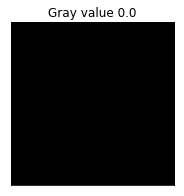

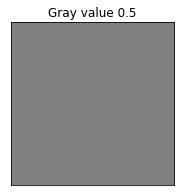

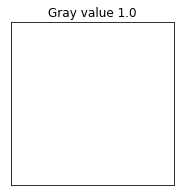

In [3]:
show_gray(0.0)
show_gray(0.5)
show_gray(1.0)

__Exercise (gray levels)__:

Now experiment with the same code in the block below. Add a shade of gray that is halfway between black and mid-level gray, and another one which is between mid-level gray and white.

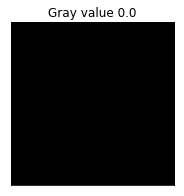

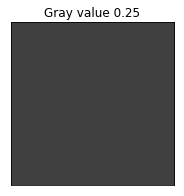

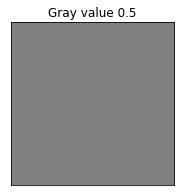

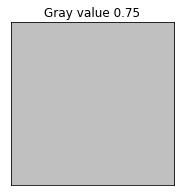

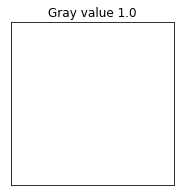

In [4]:
# SOLUTION
show_gray(0.0)
show_gray(0.25)
show_gray(0.5)
show_gray(0.75)
show_gray(1.0)

## From gray levels to colors
In order to represent colors, we need to provide more information. There are actually many systems for representing colors (we will return to that in module 4), but the most common format you will encounter in image processing is known as the RGB format. This system makes use of the fact that we perceive mixtures of red, green and blue light as a single colour. By changing the relative amounts of red, green and blue light in the mixture, we can alter the color. This is mixing is demonstrated in the following image.

<img src="rgb_mixing.png" alt="drawing" width="200"/>


First, we will define a function `show_color` for demonstrating colour mixtures. As with `show_gray`, you don't need to know the internal workings of the function. It is much more important that you get a feeling for how different R, G and B values influence the resulting colour.

In [5]:
# You do not need to understand the internals of this function, but you should understand 
#the influence different values for "red", "green" and "blue" have on the resulting color.
def show_color(red, green, blue):
        plt.rcParams["figure.figsize"] = (3,3)
        plt.imshow([[[red, green, blue]]])
        plt.title("Color R=%s, G=%s, B=%s" % (red, green, blue))
        plt.gca().xaxis.set_ticks([])
        plt.gca().yaxis.set_ticks([])
        plt.show()
   

The next code block shows you how to paint three blocks coloured by red, green and blue, which are represented as `[1.0, 0.0, 0.0]`, `[0.0, 1.0, 0.0]` and `[0.0, 0.0, 1.0]` respectively. You can see that each color is represented by three numbers, which correspond to the amount of red, green and blue respectively. In the below example, only one of these values is non-zero, meaning that you one have one color in the "mixture".

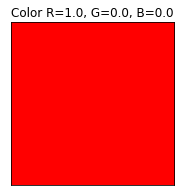

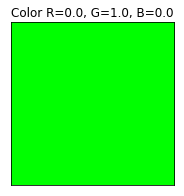

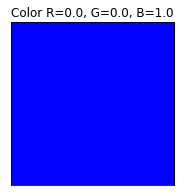

In [6]:
show_color(1.0, 0.0, 0.0)
show_color(0.0, 1.0, 0.0)
show_color(0.0, 0.0, 1.0)

Now consider some cases where we mix different amounts of red, green and blue. Below we get yellow by combing red with green.

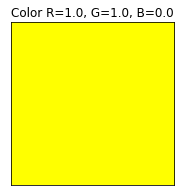

In [7]:
show_color(1.0, 1.0, 0.0)

__Exercise (Cyan and Magenta)__:

Write two statement that show the colors cyan and magenta respectively (similar to the previous code cell). 

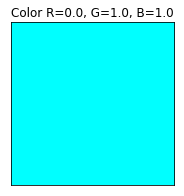

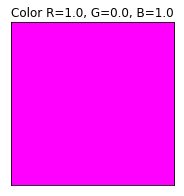

In [8]:
# SOLUTION
show_color(0.0, 1.0, 1.0)
show_color(1.0, 0.0, 1.0)

We can also vary the brightness of a color by scaling the amount of each color "ingredient" by some constant. The following code shows how you can produce darker shades of yellow by multiplying the red and green component by 0.8, 0.6 and 0.4 respectively.

In [ ]:
show_color(1.0, 1.0, 0.0)
show_color(0.8, 0.8, 0.0)
show_color(0.6, 0.6, 0.0)
show_color(0.4, 0.4, 0.0)

__Exercise (4 Shades of Orange)__:

Repeat the previous example, but display different brightnesses of the color orange instead. For the brightest shade of orange, use color component values that are one of 0.0, 0.5 and 1.0. Scale color brightness using multiplication by the same fractions as above.

In [ ]:
# SOLUTION
show_color(1.0, 0.5, 0.0)
show_color(0.8, 0.4, 0.0)
show_color(0.6, 0.3, 0.0)
show_color(0.4, 0.2, 0.0)

---
## Data Types for Color
---

Up until this point, we have represented colors using values ranging from 0.0 to 1.0. However, let's dig a bit deeper. Consider the following code.

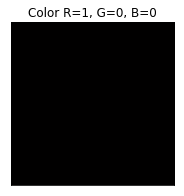

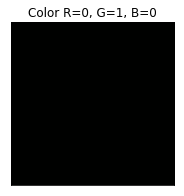

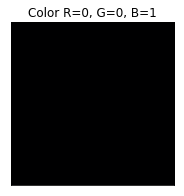

In [8]:
show_color(1, 0, 0)
show_color(0, 1, 0)
show_color(0, 0, 1)

Why does this example not work, just because we removed the fraction portion (which is just .0)? It turns out that real-valued ranges from 0.0 to 1.0 isn't how images are traditionally represented. Instead, you most often find them represented with integers ranging from 0 to 255. See the following example which fixes the previous issue.

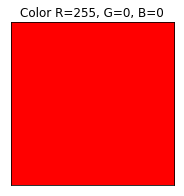

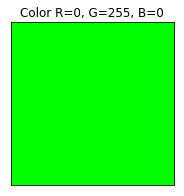

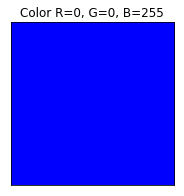

In [10]:
show_color(255, 0, 0)
show_color(0, 255, 0)
show_color(0, 0, 255)

What is happening in the background? It turns out the Python makes a distinction between integers and real numbers (technically called floating point numbers) based on how you express them. If you use a decimal point, Python reads your number as a real number (floating point). If you don't use a decimal point, Python reads it as an integer. The below code prints out the type of the value 1.0 and 1 respectively. See how the first one with the decimal point is a "float", and the second without the decimal point is an "int"?

In [ ]:
print(type(1.0))
print(type(1))

Most image libraries in Python make the distinction between floating point images and integer images. For floating point images, these libraries expect color values ranging from 0.0 to 1.0, and for integer images values ranging from 0 to 255. 

Why 0 to 255? This range stems from how computers represent integers. In RGB images, individual color components are represented in binary by a combination of eight bits (1's and 0's). For example, fully dark is represented by eight 0's 00000000 by and full brightness by eight 1's 11111111. There are exactly 256 possible combinations of sequences of 8 bits (1's and 0's), which is why the range is from 0 to 255. 

Now for a tricky part. We can dim a color by dividing its value by another number bigger than 1. Below, we divide bright red by 2, and get a darker shade of red.

In [ ]:
show_color(1.0 / 2, 0.0, 0.0)

But the below code doesn't work.

In [ ]:
show_color(255 / 2, 0, 0)

This is because dividing by 2 automatically converts integer values to floats!  See the below which shows the type of the array before and after division.

In [ ]:
print(type(255 / 2))
print(type(255.0 / 2.0))

Because the number type changes from int to float, suddently the image library expects values from 0.0 to 1.0, but is getting a value of 127.5 instead. This is why you get the warning `Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)`. The image library automatically detects that you have values outside the range 0.0 to 1.0, and rescales the image to fit into this range. You get bright red, because the value 127.5 is rescaled to 1.0, because it is the maximum value in the image.

So, if you see weird unexpected behaviour when you are specifying color values or manipulating them arithmetically, this might be a possible source your problem.

As an aside, it is possible to perform integer division using the operator //. This does division, and rounds the result down to the nearest integer.

In [ ]:
print(255 // 2)
print(type(255 // 2))

show_color(255 // 2, 0, 0)

So, which format should you use? Floating point with range 0.0 to 1.0, or integer with range 0 to 255? We recommend that you use floating point format with range 0.0 to 1.0 where possible, as it is easier for beginners to work with. They also suffer less from round-off error after mathematical operations. 

This does have some disadvantages to keep in mind:
* Floating point images use more memory than integer images (specifically 8-bit unsigned integers). For single precision floating point numbers, 4 times as much memory is necessary (if comparing with 8-bit images). For double precision floating point, this increases to 8 times the amount of memory needed. So, for large datasets, you might run out of memory more quickly if you use floating point images.
* Images from cameras are usually in some integer format (8-bit is most common, but better cameras feature a higher bit "depth" of, for example 10-bit and 12-bit). You do need to have an awareness of this when you are busy with a practical project.


Still modern image processing pipelines very often use floating point images in intermediate steps to avoid large rounding errors. Since we are concentrating on these intermediate processes in the course, this is the format you should usually prefer (except where otherwise mentioned).

---
# Representing Images
---
You migth want to have a look at the python skills multidimensional arrays before you proceed.

We can represent a grayscale image by using a square array of numbers, with each number giving the color of a single block (or pixel).

In [ ]:
img = np.array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 1.0, 0.5, 1.0, 0.0, 0.0],
                [0.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.0],
                [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);

plt.imshow(img, cmap="gray")  # This statement show the image, and specifies that this is a grayscale image.

We have just made a image which contains 4 by 7 blocks. Each block is called a pixel (short for picture element). We can ask numpy to tell us the resolution of the image using.

In [ ]:
print(img.shape)

Note that the shape of an image returns first the number of rows (y-axis) and then the number of columns (x-axis).

We can do the same for color images, except that each single gray value needs to be replaced by a set of three values (R, G and B). The below code draws a yellow diamond filled with blue.

In [ ]:
img = np.array([[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
                [[0.0, 0.0, 0.0], [1.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 1.0, 0.0], [0.0, 0.0, 0.0]],[[1.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 1.0, 0.0]],
                [[0.0, 0.0, 0.0], [1.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 1.0, 0.0], [0.0, 0.0, 0.0]],
                [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [1.0, 1.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]])
plt.imshow(img)

Please check the number of square brackets `[...]` in the above pieces of code very carefully. In the grayscale version, we see:
  
`[[,,,,],
  [,,,,],
  [,,,,],
  [,,,,],
  [,,,,]]`

While in the color version we see:

`[[[,,][,,][,,][,,][,,]],
  [[,,][,,][,,][,,][,,]],
  [[,,][,,][,,][,,][,,]],
  [[,,][,,][,,][,,][,,]],
  [[,,][,,][,,][,,][,,]]]`

  
That is because grayscale values are represented with a single number, but each color is represented with a list of 3 values, which need a pair of brackets around them. 

You check the image dimensions again using .shape

In [ ]:
print(img.shape)

Notice that there is an extra dimension, 3. That 3 represents the red, green and blue channel. It is possible to ask just for the red channel, green channel or blue channel as in the below commands.

In [ ]:
red_channel = img[:,:,0] # Get the red channel
plt.imshow(red_channel, cmap="gray")
plt.show()

green_channel = img[:,:,1] # Get the green channel
plt.imshow(green_channel, cmap="gray")
plt.show()

blue_channel = img[:,:,2] # Get the blue channel
plt.imshow(blue_channel, cmap="gray")
plt.show()

Above you can see the red and green channels contain the outer diamond (and combine to make the outer diamond yellow). The interior of the diamond is represented only in the blue channel, so the diamond interior is blue.

We can combine the channels into a colour image again using the `np.dstack` command as in the following code block

In [ ]:
restored_image = np.dstack([red_channel, green_channel, blue_channel])
plt.imshow(restored_image)

What happens if we swap the order of the color channels? (Hint: This is particularly relevant for understanding the next section)

In [ ]:
restored_image = np.dstack([blue_channel, green_channel, red_channel])
plt.imshow(restored_image)

# Exercise: 

Create and plot an image to represent the following smiley face pattern. First make a grayscale image, then make an image that uses color.

    @@@@@@@@
    @@*@@*@@
    @@@@@@@@
    @*@@@@*@
    @******@
    @@@@@@@@

For the grayscale image, use a black cel for each `@` and a white cell for each `*`.


In [ ]:
# SOLUTION
grayscale = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                      [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
plt.imshow(grayscale, cmap='gray')

In [ ]:
# SOLUTION
colorface = np.array([[[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[0.0, 0.0, 1.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[0.0, 0.0, 1.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 0.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 0.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 0.0, 0.0],[1.0, 0.0, 0.0],[1.0, 0.0, 0.0],[1.0, 0.0, 0.0],[1.0, 0.0, 0.0],[1.0, 0.0, 0.0],[1.0, 1.0, 0.0]],
                      [[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0],[1.0, 1.0, 0.0]]])

plt.imshow(colorface)

---
# Using Machine Vision Libraries
---

While it is possible for us to write code for every task we'd like to perform, this is often a case of reinventing the wheel. Instead, there are a number of excellent machine vision libraries that implement key functions for performing machine vision tasks. In this course, we will introduce you to openCV.

OpenCV is a well know industry standard vision library. Although it can be accessed from Python, it is written in the C++ language for speed. Because of the widespread use of this library, it is well worth the effort to learn about its functionality.

We will start with an introductory look at OpenCV in the subsequent sections. First we have to load it. That is done with the following code.

In [ ]:
import cv2 #the openCV package is for historical reasons called cv2 in python.

---
## Loading and showing an image
---

OpenCV has a function to read images called `cv2.imread()`. The function reads the image and places it in a numpy array. In the next few exercises, we are going to work with this image:
<img src="Data_Tutorial1/image1.png" width="400px">.

__Exercise (imread)__:

Run the code below to load the image and show the dimensions of the image using `img.shape`. How many rows and colums does the image have? How many color channels?


In [ ]:
img = cv2.imread("Data_Tutorial1/image1.png")
print(img.shape)

You should have noticed that the first dimension are the rows, the second the colummns and the third the color channels. The image has a _height_ of 462 (the number of rows), a _width_ of 642 (the number of columns) and 3 color channels.

__Exercise (imshow):__
1. The code below displays the image using matplotlib's `imshow` function. Do you notice something wrong with the image display?

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

You should have noticed that the colors in the image are weird. The reason for this is that OpenCV loads color images with the color channels in the order: Blue-Green-Red (BGR). Matplotlib, on the other hand, assumes a Red-Green-Blue (RGB) order. There is an historical reason for the OpenCV order: earlier cameras and frame grabbers provided the pixel information in this order. Several functions in the library assume this color order. We will therefore work with the images in BGR format. When we want to display the images, we will make a copy of the image and change the order. The function `imshow_rgb`, defined below, does this using the function `cv2.cvtColor` with the setting `cv2.COLOR_BGR2RGB`.

__Exercise (imgshow_rgb):__
1. Run the code and observe the results

In [ ]:
# Set figure size so that images are large enough
plt.rcParams['figure.figsize'] = [20, 10]

def imshow_rgb(img_bgr):                            #function to display an image using RGB color format.                                                       #read images, plt.imshow builds a window with the image in it, plt.show 
    img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
     
plt.subplot(1,2,1)  # Create subplot 1 (3rd argument) of (1 row, 2 columns)
plt.imshow(img)     # Plot using the BGR color format
plt.title("BGR image")

plt.subplot(1,2,2)  # Create second subplot
imshow_rgb(img)     # Use the new function to plot using RGB color format
plt.title("RGB image")
plt.show()

The default of the `cv2.imread` function is to load the image as a color image. Instead of loading an image as color image, you can also load the image as a gray-scale image using the parameter `flags = cv2.IMREAD_GRAYSCALE`. The default value for the function is `cv2.IMREAD_COLOR`.

In [ ]:
img_bgr = cv2.imread("Data_Tutorial1/image1.png", flags = cv2.IMREAD_COLOR)
img_gray = cv2.imread("Data_Tutorial1/image1.png", flags = cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
imshow_rgb(img_bgr)
plt.title("Loaded as color image")
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')        # cmap='gray' is needed to plot it in gray-scale  
plt.title("Loaded as gray-scale image")
plt.show()

__Exercise (image dimensions):__
1. Print the dimensions of both images

In [ ]:
# Code to print the dimensions of the img_bgr and img_gray images
# ...

# SOLUTION
print(img_bgr.shape)
print(img_gray.shape)

### Image data types

Standard, when using `cv2.imread`, images are loaded with a 8-bit representation, using _unsigned 8-bit integers_ (`uint8` in Python). You can ask the type of a numpy array using `x.dtype`:

In [ ]:
print("The data type: ", img_bgr.dtype)

As we discussed earlier in the notebook, an 8-bit gray-scale image can only store $2^8=256$ different intensity values per pixel. For a color image, we have one 8-bit value for the red, green and blue components respectively. So, for a color image, the number of possible colors is the number of combinations of three 8-bit gray values. This gives $2^8 \times 2^8 \times 2^8 = 2^{24}$ possible colors per pixel (approximately 16.8 million). This is typically enough for gray-scale and color images. For some applications, however, it is necessary to store image information with higher precision. For this we can using floating point images, which use floating point values to represent colors.

In [ ]:
img_gray_float = cv2.imread("Data_Tutorial1/image1_float.tif", flags = cv2.IMREAD_ANYDEPTH)
print("The data type: ", img_gray_float.dtype)
print("The dimensions: ", img_gray_float.shape)

plt.imshow(img_gray_float, cmap='gray')
plt.colorbar()
plt.show()

__Exercise (colorbar):__
1. What do you notice if you look at the colorbar?

In [ ]:
# Solution: We have loaded a floating point image, and this can be seen in the colorbar by the fact that it ranges from 0.0 to 1.0.

### Slicing and regions-of-interest

The images are loaded as numpy arrays. That means that we can also take parts of the image using the slicing techniques that we have studied in the Python introduction. 

__Exercise (region of interest):__
1. Make a 1D plot showing the intensity values of row 300 of image `img_gray_float` using `plt.plot(...)` 
2. Plot a subimage of the region-of-interest [100:200, 200:400]

In [ ]:
# Add the code here to plot the intensity of row 300
plt.subplot(1,2,1)
plt.plot(___)

# Add the code here to show the subimage of the region-of-interest [100:200, 200:400]
plt.subplot(1,2,2)
plt.imshow(___)

plt.show()

In [ ]:
# SOLUTION

# Add the code here to plot the intensity of row 300
plt.subplot(1,2,1)
plt.plot(img_gray_float[300]) # Note that another valid interpretation of the question would instead use 299 (since this is the 300th index after starting the count from 0)

# Add the code here to show the subimage of the region-of-interest [100:200, 200:400]
plt.subplot(1,2,2)
plt.imshow(img_gray_float[100:200, 200:400], cmap='gray')

plt.show()

---
## Image resolution
---


The spatial resolution of an image can be changed using the function `cv2.resize`. In the following piece of code, six different resolutions of the same image are shown. Note that we are using a for loop to go through a set of different rescaling factors. If the working isn't clear for you, try adding `print(i, rf)` just below the for statement. This prints out the value of `i` and `rf` for each repetition of the loop. Please note, only at the point we call plt.show() do the subfigures actually appear. Please note that even though the images have the same size, the scale of the x- and y-axis changes.

Before you go on, you might want to read the Python_skills forloops

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

img_bgr = cv2.imread("Data_Tutorial1/flower.jpg")

resize_factors = [1, 2, 4, 8, 16, 32]
for i, rf in enumerate(resize_factors):
    img_resize = cv2.resize(img_bgr, (0,0), fx = 1.0/rf, fy = 1.0/rf)
    plt.subplot(2,3,i+1)
    imshow_rgb(img_resize)
    plt.title("%dX%d image" % (img_resize.shape[0], img_resize.shape[1]))
plt.show()

__Exercise (image sizes):__
1. Add some lines to the above piece of code to calculate and print the total number of bytes needed to store these images. Reminder: each color that is to be saved per pixel requires 1 byte

In [ ]:
# SOLUTION
# First we determine the data type and shape of each resized image, the following prints out the type for each resized image, this turns out to be uint8. 

img_bgr = cv2.imread("Data_Tutorial1/flower.jpg")
resize_factors = [1, 2, 4, 8, 16, 32]
for i, rf in enumerate(resize_factors):
    img_resize = cv2.resize(img_bgr, (0,0), fx = 1.0/rf, fy = 1.0/rf)
    print(img_resize.dtype, img_resize.shape)

In [ ]:
# Now, the images have the uint8 data type. This means that each pixel color channel is 1 byte. There are 3 color channels (Red, Green and Blue), so each pixel is 3 bytes.
# To get an image's size, we multiple the number of rows and columns by 3. The following code does this.

img_bgr = cv2.imread("Data_Tutorial1/flower.jpg")

resize_factors = [1, 2, 4, 8, 16, 32]
for i, rf in enumerate(resize_factors):
    img_resize = cv2.resize(img_bgr, (0,0), fx = 1.0/rf, fy = 1.0/rf)
    plt.subplot(2,3,i+1)
    imshow_rgb(img_resize)
    plt.title("Size %dX%dX3 = %d bytes" % (img_resize.shape[0], img_resize.shape[1], img_resize.shape[0] *  img_resize.shape[1] * 3))
plt.show()

---
## Image arithmetic
---

An image is represented by a Numpy array. We can do all sorts of arthmetic on such a array to change the intensity levels in the image. However, like for single colors, we must be very careful about how our images are represented (uint8 vs. float). The following tries to darken the original image by multiplication with 0.5. The code tries this in two different ways. The first directly uses numpy's multiplication `* 0.5`. The second approach uses OpenCV's `cv2.multiply` function.

In [ ]:
# Load a gray-scale image
img_gray = cv2.imread('Data_Tutorial1/OpenCV.png', flags=cv2.IMREAD_GRAYSCALE)

# Take half the value of the image using NUMPY
img_gray_add_numpy = img_gray * 0.5

# Take half the value of the image using OPENCV
img_gray_add_opencv = cv2.multiply(img_gray, 0.5)

# Plot the results
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(img_gray_add_numpy, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('multiply by 0.5 using numpy')
plt.subplot(1,3,3)
plt.imshow(img_gray_add_opencv, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('multiply by 0.5 using openCV')
plt.show()

Only the OpenCV version looks correct. What is wrong with the Numpy version? This situation is similar to the case where we were dividing integer 255 by 2, getting a float of 127.5 back. cv2.imread loaded the image as an unsigned-byte image with values ranging from 0 to 255. We can fix our problem by dividing the original image by 255.0, thereby converting it from an unsigned byte image with values ranging from 0 to 255 into a float image with values ranging from 0.0 to 1.0.

In [ ]:
# Load a gray-scale image
img_gray = cv2.imread('Data_Tutorial1/OpenCV.png', flags=cv2.IMREAD_GRAYSCALE) / 255.0

# Add a constant value of 50 to the image using NUMPY
img_gray_add_numpy = img_gray * 0.5

# Add a constant value of 50 to the image using OPENCV
img_gray_add_opencv = cv2.multiply(img_gray, 0.5)

# Plot the results
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(img_gray_add_numpy, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('multiply by 0.5 using numpy')
plt.subplot(1,3,3)
plt.imshow(img_gray_add_opencv, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('multiply by 0.5 using openCV')
plt.show()

Note that OpenCV's multiply function works in both cases. This is because OpenCV's arithmetic functions are aware that we are dealing with image data, so they tend to make correct decisions regardless of how the images are represented. In contrast, Numpy is used for all sorts of mathematical calculations, so it does not treat images in a special way. This example is meant to illustrate you have to be a bit careful around image representations. The follow example will show another subtle issue.

Let's now try adding 50 to the original image (represented as unsigned bytes rangeing from 0 to 255). We can use two methods using (1) Numpy and (2) OpenCV. Run the code below.

In [ ]:
# Load a gray-scale image
img_gray = cv2.imread('Data_Tutorial1/OpenCV.png', flags=cv2.IMREAD_GRAYSCALE)

# Add a constant value of 50 to the image using NUMPY
img_gray_add_numpy = img_gray+50
# Add a constant value of 50 to the image using OPENCV
img_gray_add_opencv = cv2.add(img_gray, 50)

# Plot the results
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(img_gray_add_numpy, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('add 50 using numpy')
plt.subplot(1,3,3)
plt.imshow(img_gray_add_opencv, cmap='gray', norm=matplotlib.colors.NoNorm())
plt.title('add 50 using openCV')
plt.show()

__Exercise (image addition):__
1. Clearly, there is a difference in the background depending if you use numpy or openCV to add the constant value. Take a 10x10 subimage using `print(img[200:210,72:90])`.
2. How can you explain the difference in the values?

You can show the differences in the numpy and openCV results by subtracting two images (`diff = A - B`). Where the images are the same, the pixels will have a value of 0. Values differing from 0 show that there is a difference:

In [ ]:
img_diff = img_gray_add_numpy - img_gray_add_opencv
plt.imshow(img_diff)
plt.colorbar()
plt.show()

## Solution and discussion

Remember that white is represented by 255 in an unsigned byte image? Now, the background in this image is white. What happens if we add 50 to these values (all 255)? We know that unsigned bytes have a range from 0 to 255. Compare the following statement

In [ ]:
255 + 50

with the following

In [ ]:
np.uint8(255) + np.uint8(50)

As you can see, unsigned bytes range from 0 to 255. Adding a positive quantity to an unsigned byte 255 causes the result to *WRAP AROUND* to 0.

We can illustrate this using the numpy function `arange`, which outputs a sequence of numbers of a particular type.

In [ ]:
np.arange(10)

Crucially, we can choose the type of these numbers as well.

In [ ]:
print(np.arange(10, dtype=np.uint8))
print(np.arange(10, dtype=np.float))

Let's plot all values from 0 to 500.

In [ ]:
plt.plot(np.arange(0, 501, dtype=np.float))

Let's do this for `uint8` values instead

In [ ]:
plt.plot(np.arange(0, 501, dtype=np.uint8))

Can you see that the values wrap as soon as they hit 256? Now you can see what is happening to the white background when adding 50 to its gray value.